In [1]:
import sys,time
sys.path.append('../')
from smodels.experiment.defaultFinalStates import finalStates
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.decomposition.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.tools.genericSMS import GenericSMS
from smodels.base.model import Model
from smodels.base.physicsUnits import fb, GeV, TeV, pb
from smodels.experiment.txnameObj import TxName, TxNameData
from smodels.experiment.infoObj import Info
import numpy as np
import unum
from itertools import product

In [2]:
def sort(self, nodeIndex=None):
    """
    Sort subtree of self generated by nodeIndex.
    If nodeIndex is None, sort the tree and re-number the nodes
    according to the bfs order (after sorting).
    If the self is already tagged as sorted and force = False,
    do nothing.

    : param nodeIndex: Node index
    """

    if nodeIndex is None:
        cName = self.canonName  # Just to make sure canonName is defined
        if cName is None:
            return
        nodeIndex = self.rootIndex

    daughters = self.daughterIndices(nodeIndex)
    if daughters:
        for d in daughters:
            sort(self,d)
        sorted_daughters = sortSubTrees(self,daughters)


        # Remove nodeIndex -> daughters edges
        self.remove_edges(product([nodeIndex],daughters))
        # Add edges with the correct ordering:
        self.add_edges_from(product([nodeIndex],sorted_daughters))

    # Finally, after sorting the subtrees,
    # make sure the nodes are sorted and numbered according
    # to the generations (breadth-first search)
    if nodeIndex == self.rootIndex:
        self.bfs_sort(numberNodes=False)


def sortSubTrees(self, subtreeList):
    """
    Sorts a list of subtrees of self generated by the nodes
    in subtreeList using a quicksort algorithm.
    All the subtrees should have a common topology
    (same canonical name).

    : param subtreeList: List of node indices

    : return: Sorted list of node indices.
    """

    if len(subtreeList) == 1 or len(subtreeList) == 0:
        return subtreeList

    s = subtreeList[:]
    pivot = s[0]
    i = 0
    for j in range(len(s)-1):
        if compareSubTrees(self,self, s[j+1], pivot) < 0:
            s[j+1], s[i+1] = s[i+1], s[j+1]
            i += 1
    s[0], s[i] = s[i], s[0]
    first_part = sortSubTrees(self,s[:i])
    second_part = sortSubTrees(self,s[i+1:])
    first_part.append(s[i])

    sortedList = first_part + second_part

    return sortedList

def compareSubTrees(self, other, n1, n2):
    """
    Compare the subtrees generated by the nodeIndex n1 in self
    and the nodeIndex n2 in other.

    :param other: TheorySMS object (if other=self compare subtrees of the same SMS).
    :param n1: Node index for the root of subtree1
    :param n2: Node index for the root of subtree2

    :return: 0, if subtrees are equal, -1 if subtree1 < subtree2, 1 if subtree1 > subtree2
    """

    # Compare node canonical names
    cName1 = self.nodeCanonName(n1)
    cName2 = other.nodeCanonName(n2)
    if cName1 != cName2:
        if cName1 < cName2:
            return -1
        else:
            return 1

    # Compare nodes
    root1 = self.indexToNode(n1)
    root2 = other.indexToNode(n2)
    if root1.isInclusive:
        return -1
    elif root2.isInclusive:
        return 1
    
    if str(root1) != str(root2):
        if str(root1) > str(root2):
            return 1
        else:
            return -1
    
    daughters1 = self.daughterIndices(n1)
    daughters2 = other.daughterIndices(n2)
    # If nodes are leaves, return 0
    if len(daughters1) == len(daughters2) == 0:
        return 0

    # Check if the daughters from n2 match the ones from n1:
    # (the daughters should be sorted at this point)
    for i1, d1 in enumerate(daughters1):
        d2 = daughters2[i1]
        cmp = compareSubTrees(self,other, d1, d2)
        if cmp != 0:
            return cmp
    return 0

In [8]:
sms1 = ExpSMS.from_string('(PV > anyBSM(1), anyBSM(2)), (anyBSM(1) > e-,MET), (anyBSM(2) > L,MET)',
                        model=finalStates)
sms2 = ExpSMS.from_string('(PV > anyBSM(1), anyBSM(2)), (anyBSM(1) > L,MET), (anyBSM(2) > e-,MET)',
                        model=finalStates)


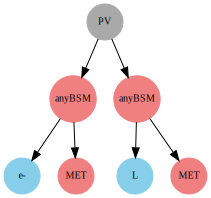

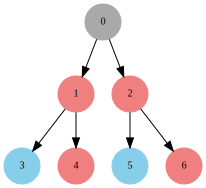

In [9]:
sms1.draw()
sms1.draw(labelAttr='node')
# sms2.draw()

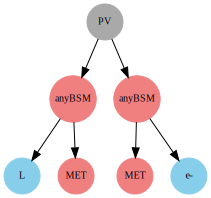

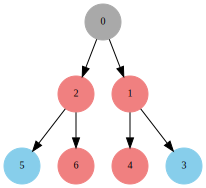

In [10]:
sort(sms1)
sms1.draw()
sms1.draw(labelAttr='node')

In [12]:
orderedList = [nodeIndex for nodeIndex,_ in sms1.genIndexIterator(includeLeaves=True)]
indexDict = {n : orderedList.index(n) for n in sms1.nodeIndices}
print(indexDict)

{0: 0, 2: 1, 1: 2, 5: 3, 6: 4, 4: 5, 3: 6}


In [7]:
sms.draw()

NameError: name 'sms' is not defined

In [ ]:
int(True)